# Introducción a la Complejidad Computacional Cuántica
$\textit{escrito por Adriano Lusso}$

## 1. Introducción

## 2. Estructura del notebook

El objetivo central de este notebook es estudiar la clase de problemas $BQP$ (Bounded error Quantum Polynomial Time). Tambien se estudiará las ventajas y limitaciones de la computación cuántica cuando se hace uso de un $\textit{modelo de caja negra}$, el bestiario de las otras clases de complejidad cuántica y demas temas relevante.

Para llevar a cabo exitosamente la lectura de este notebook, $\textbf{se requieren conocimiento introductorios}$ sobre $\textbf{computación cuántica}$ y $\textbf{complejidad computacional clásica}$.

## 3. Conceptos básicos

### 3.1 Computabilidad y complejidad computacional

En la teoría de la computación, hay dos rubros de gran relevancia y conectados profundamente entre sí. El primero de ellos es la $\textbf{teoría de la computabilidad}$, establecido por Godel, Turing y otros teoricistas de su época. En este campo, se crearon conceptos como la noción de que es la computabilidad y como puede representarse con un modelo conocido como $\textit{Máquinas de Turing}$. El objetivo principal es categorizar entre que tipos de problemas son computables y cuales no lo son. 

Por otro lado, la $\textbf{teoría de la complejidad}$ trabaja sobre los problemas que previamente se han demostrado como computables. Ahora, lo que se busca es categorizar estos problemas en función de cuantos recursos consumen para lograr correctamente su ejecución. Los recursos que mas suelen usarse para estas categorizaciones de clase son el tiempo y el espacio ocupado. Este campo teórico fue el que establecio una de las preguntas sin respuesta mas importante de las ciencias de la computación:  $P=NP?$. En forma coloquial, se pregunta si la clase de problemas que pueden resolverse con una computadora clásica en tiempo polinomial es igual a la clase de problemas que pueden resolverse con una computadora clásica en tiempo exponencial. Si bien la mayoría de teoricos apuntan a que la respuesta a esta pregunta es que no son iguales, a día de hoy no se ha logrado una demostración formal que verifique o contradiga esta inclinación por parte de investigadores.

### 3.2 Mecánica cuántica

La mecánica cuántica es la rama de la física que estudia el comportamiento de la naturaleza a escala de átomos y de partículas subatómicas. Esta rama plantea muchas situaciones, de indole física, las cuales se contradicen con la teoría clásica de la física. Informalmente, plantea un marco en el que muchas posibilidades pueden suceder a la vez. Esto es algo que se siente poco intuitivo para un razonamiento clásica de como se comportan las cosas. Un ejemplo para esto es:

    Que un único fotón, dada la posibilidad de eligir entre dos rendijas, pueda mostrar marcas de oscuridad y luz. Esto viola principios básicos de probabilidad clásica.
    
Si se deja de lado el apartado físico de la mecánica cuántica, y nos concentramos unicamente el su representación matematica, se vuelve más facil de entender. Principalmente, puede entendersela como una extensión de la estadística clásica. Un bit de una computadora clásica puede escribirse como un vector que representa la probabilidad de que ese vector sea $0$ o que sea $1$. Debe respetarse que la norma $L1$ del vector sea igual a $1$.

$\text{bit 0} =\begin{pmatrix}
1\\
0
\end{pmatrix}$,
$\text{bit 1} =\begin{pmatrix}
0\\
1
\end{pmatrix}$

Por otro lado, un operador en una computadora clásica puede escribirse como una matriz, en la que la norma $L2$ de los elementos de cada columna debe ser igual a $1$.

$\text{compuerta NOT} =\begin{pmatrix}
0 & 1\\
1 & 0\\
\end{pmatrix}$

La pregunta que surge ahora es, ¿Podemos tener un estado (bit clásico) que tenga $50\%$ de probabilidades de ser $1$ y $50\%$ de ser $0$? La respuesta es sí, y en la computación se lo conoce como $\textbf{bit probabilístico}$.

$\text{bit probabilístico} = \begin{pmatrix}
0.5\\
0.5
\end{pmatrix}$

Esta misma idea puede aplicarse a los operadores. Por ejemplo, podriamos crear un operador que, si la entrada es $0$, tenga un $40\%$ de probabilidades de que mantenga su valor; y si la entrada es $1$, que tenga $75\%$ de probabilidades de que mantenga su valor. 


$ \text{operador probabilístico} = \begin{pmatrix}
0.4 & 0.25\\
0.6 & 0.75\\
\end{pmatrix}$

Si ahora modificamos las condiciones respecto a la norma $L1$ para vectores y columnas de operadores y hacemos que su respectiva norma $L2$ sea igual a $1$, logramos obtener estados y compuertas cuánticas. Los estados cuánticos de menor tamaño posibles son los $\textbf{qubits}$. A su vez, un estado cuántico puede estar formado por miles y miles de qubits.

$| 0 \rangle = \begin{pmatrix}
1\\
0
\end{pmatrix}$,    $| 1 \rangle = \begin{pmatrix}
0\\
1
\end{pmatrix}$,   $\frac{1}{\sqrt{2}}| 0 \rangle + \frac{1}{\sqrt{2}}| 1 \rangle = \begin{pmatrix}
\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}
\end{pmatrix}$,     $ H = \frac{1}{\sqrt{}} \begin{pmatrix}
1 & 1\\
1 & -1\\
\end{pmatrix}$




### 3.3 Computación cuántica: uniendo los conceptos básicos

Un estado cúantico con $n$ qubits se compone de $2^n$ vectores de estado, donde cada vector tiene su amplitud representada por un número complejo. Esto significa que, para trabajar con $1000$ párticulas...La naturaleza debe mantener registro de $2^{1000}$ números complejos! En base a este razonamiento nacio el concepto de la computación cuántica, el cual busca poner este inmenso poder de computo, innato de la naturaleza, a trabajar para nosotros. Pero,¿Realmente existe alguna función que tome tiempo más que polinomial en computarse en una computadora clásica, pero que solo tome tiempo polinomial en una computadora cuántica?

Responder esta pregunta es crucial, ya que en su respuesta afirmativa yace la motivación a querer desarrollar este nuevo paradigma de computo.

## 4. Clase BQP

### 4.1 Definición

Formalmente, se define a $BQP$ como a la clase de lenguajes $L \subset \{0,1\}^*$ para los que existe una familia uniforme de circuitos cuánticos de tamaño polinomial $C_n$, un conjunto base de compuertas universales y un polinomial $q$ de manera que para todo $n$ y entradas $x \in \{0,1\}^n$:

* Si $x \in L$, entonces $C_n(| x \rangle | 0 \rangle^{\otimes q(n)} )$ acepta con una probabilidad mayor a $2/3$.
* Si $x \notin L$, entonces $C_n(| x \rangle | 0 \rangle^{\otimes q(n)} )$ acepta con una probabilidad menor a $1/3$.



### 4.2 Interpretando la definición

La definición antes dada puede ser dificil de entender, sobre todo para estudiantes que no provengan del campo de las ciencias de la computación. Por lo tanto, trataremos de desarrollar una noción intuitiva de lo que el formalismo trata de definir.

Para que un problema pertenezca a la clase $BQP$ debe cumplir lo siguiente:

* El problema debe poder representarse como un lenguaje $L$ que tenga cadenas formadas por $1$ y $0$. Por ejemplo, $1100110$, $01$, etcetera.
* Debe existir una familia de circuitos que sea...
    - Uniforme: debe existir una maquina de Turing $M$ que permita emular satisfactoriamente el comportamiento de cada uno de los circuitos de la familia en una misma clase temporal. Por ejemplo, si es $P$-uniforme, la maquina de Turing hara la emulacion en tiempo polinomial. Recordemos que las maquinas de Turing son, al igual que los circuitos, otro modelo para representar computación.
    - De tamaño polinomial: que la cantidad de compuertas requeridas para construir cada uno de los circuitos de la familia se pueda obtener a traves de una función polinomial en $n$, siendo $n$ la cantidad de variables entrantes del circuito. Por ejemplo, para un conjunto de $n$ bits, si queremos computar la paridad de estos, podemos crear el circuito $XOR$. Este circuito usara $O(n)$ compuertas. Es decir, la cantidad de compuertas se determina polinómicamente en función de $n$.
* Debe existir un conjunto base de compuertas universales. Esto es, un conjunto de compuertas a traves de las cuales puedas construir cualquier otro tipo de compuertas, en base a combinarlas entre sí.

Cada circuito de la familia uniforme recibira entradas de un determinado tamaño $n$. Entonces, para cada uno de estos circuitos, cada posible entrada de tamaño $n$, que tendra la forma de una cadena de $1$ y $0$ de tamaño $n$, se debe cumplir que:

* Si $x$ pertenece a $L$ (recordemos que $L$ es un lenguaje que, si cumple todas las condiciones, pertenecera a $BQP$) entonces el circuito aceptara a esta cadena con una probabilidad mayor a los $2/3$.
* Si $x$ no pertenece a $L$, el circuito aceptara a esta cadena con una probabilidad menor a $1/3$. Dicho de otra forma, rechazara a la cadena con probabilidad mayor a $2/3$.

Es importante destacar que esta clase es de $\textbf{error acotado}$, pero no significa que no exista error. Si no existiera error alguno, siempre que una cadena perteneciera a $L$, sería aceptada. Pero en el caso de $BQP$, solo puede garantizar con una probabilidad mayor a $2/3$ que se acepte exitosamente la cadena. Es decir, aún existe probabilidad de error.

### 4.3 Propiedades de BQP

La imagen que se ve a continuación describe como se ubica la clase $BQP$ en la jerarquía de clases clásicas.

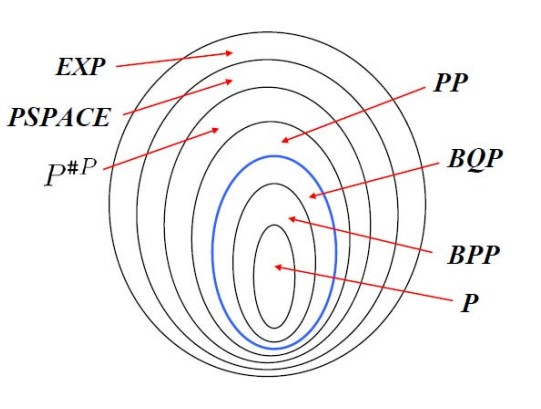

In [2]:
from PIL import Image
img = Image.open(r'C:\Users\54299\Desktop\Facultad\Trabajos\QuantumQuipu\Educacion y divulgacion\QComplexity\jerarquiaPolinomial.jpg')
display(img)

* $P \subseteq BPQ$

Es trivial entender que un circuito cuántico puede emular cualquier circuito clásico. Recordemos que un bit clásico puede ser notado como un vector de estado con probabilidad del $100%$, ya sea para el valor $0$ o el $1$.

* $BPP \subseteq EXP$

Los estados cuánticos se escriben como una combinación lineal de otros estados cuánticos. Es decir, $| y \rangle = \sum \alpha_x | x \rangle$. Por lo tanto, podemos usar computadoras clásicas probabilísticas para emular la evolución de los estados vectoriales en tiempo exponencial.

* $BQP \subseteq PSPACE$

Inicialmente, representar estados cuánticos y su evolución utlizando modelos como la imagen de Schrodinger ($| y \rangle = \sum \alpha_x | x \rangle$) o la matriz de densidad de Heisenberg (modelo en el que no se entrara en detalle en este notebook) conlleva una simulacion exponencial en terminos de espacio. Esto se debe a la gran cantidad de calculos que requiere llevar a cabo la evolución de los vectores de estado.

Sin embargo, utilizando el modelo de $\textbf{integral de caminos de Feynman}$ se puede lograr una simulación polinomial en terminos de espacio.

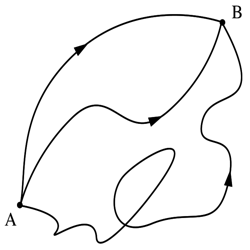

In [3]:
img = Image.open(r'C:\Users\54299\Desktop\Facultad\Trabajos\QuantumQuipu\Educacion y divulgacion\QComplexity\integralCamino.png')
img = img.resize((250,250))
display(img)

En la imagen superior, puede verse un ejemplo de integral de caminos entre dos estados $A$ y $B$. En terminos generales, este modelo consiste en tomar cada camino entre los puntos, calcular su acción(es decir, el tiempo y energía necesarios para recorrer el camino) y obtener en base a eso la amplitud. Este ultimo término hace referencia a la probabilidad de que una particula recorra ese camino. Finalmente, se suman todas las amplitudes para obtener la amplitud total de una particula que va desde $A$ hasta $B$. Todo este procedimiento descrito puede efectuarse en $PSPACE$.

* $BPQ \subseteq P^{\#P} \subseteq PSPACE$

$\#P$ Es la clase de problemas de conteo. Hay una clase de problemas de decisión( problemas con respuesta $SI$ o $NO$), que es la clase $P$ con un oráculo $\#P$, notado $P^{\#P}$. Como los problemas de conteo pueden resolverse en espacio polinomial, $P^{\#P} \subseteq PSPACE$. A su vez, $\#P$ puede seguir todos los caminos posibles de forma no determinística usando el integral de caminos de Feynman, con lo que podemos determinar que $BPQ \subseteq P^{\#P} $.

* $BQP \subseteq PP$

$PP$ incluye a los problemas que se resuelven probabilísticamente en tiempo polinomial y con probabilidad de exito igual o mayor al $50\%$. Se puede comparar con $BPP$, que es la versión probabilística acotada. Esta clase no es realizable físicamente. $PP$ es la versión para problemas de decisión de $\#P$. Esto significa que no podemos contar el numero caminos aceptados en una máquina de Turing no deterministica, pero podemos preguntar si el número de caminos aceptados es mayor o menor al de caminos rechazados.
SEGUIR DESPUES PORQUE SE COMPLEJIZA

* $BPP \neq BQP$

Si pudieramos probar que las computadoras cuánticas exceden a las clásicas, implicaria que $P \neq NP$.

### 4.4 NP respecto a BQP

A día de hoy, no se sabe como se ubica $NP$ en el diagrama de inclusión ni como se relaciona con $BQP$. Se cree que $NP \not \subseteq BQP$, lo que significa que una computadora cuántica no puede resolver problemas $NP-complete$ en tiempo polinomial. Sin embargo, hay seguridad sobre si $BQP \not \subseteq NP$.

Otras conclusiones importantes serían que si se demostrara que $P = NP$ o que $P = PP$, entonces $P = BQP$. Es decir, que la supuesta ventaja cuántica no seria real. PREGUNTAR ESTO A LA LAURA.

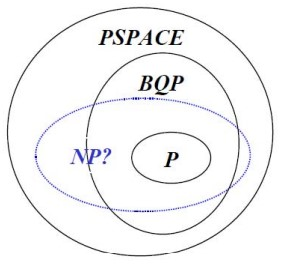

In [4]:
img = Image.open(r'C:\Users\54299\Desktop\Facultad\Trabajos\QuantumQuipu\Educacion y divulgacion\QComplexity\NPvsBQP.jpg')
display(img)

### 4.5 Propiedades estructurales de BQP

En la computación clásica, sabemos que podemos escribir un algoritmo que sea usado como una subrutina de otro algoritmo
¿Es posible esto en la computación cuántica? Dicho de otra forma, $¿BQP^{BQP} = BQP?$

Supongamos un programa cuantico $| work(x) \rangle | output(x) \rangle$ tal que $x$ es el estado de entrada. Si $x=0$, tenemos  $| work(0) \rangle | output(0) \rangle$. Si $x=1$, tenemos  $| work(1) \rangle | output(1) \rangle$. En este programa, $|work(x)\rangle$ representa a una subrutina y $|output(x) \rangle$ representa el resultado que se mide.
En principio, podríamos pensar que los qubits ancilla de la subrutina se descartan luego de ser usados. Por lo tanto, no tendran efecto en futuros calculos con el resultado de la subrutina.

Sin embargo, pensemos el siguiente ejemplo. Supongamos un estado de entrada $| 0 \rangle + | 1 \rangle$ tal que el algoritmo resulte en $| work(0) \rangle | output(0) \rangle + | work(1) \rangle | output(1) \rangle$. Expresado de otra manera, seria $|00\rangle + |11\rangle$. A esto se lo conoce como un $\textbf{estado entrelazado}$ entre el espacio de la subrutina y el de la salida. Es decir, $\textbf{los estados en el espacio de la subrutina afectaran al resultado de futuras operaciones en el}$ $\textbf{espacio de la salida}$, cuando en principio no deberia ser así. Es necesario que los qubits ancilla de una subrutina unicamente afecten al valor de sus qubits resultados durante la ejecución de la subrutina en sí.

Para solucionar este problema, Charles Bennett introdujo el concepto de $\textbf{uncomputing}$.

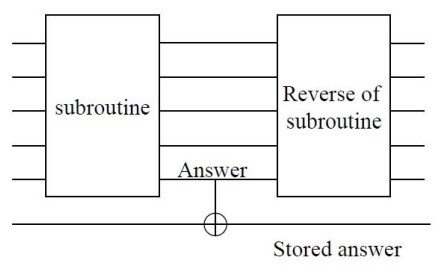

In [5]:
img = Image.open(r'C:\Users\54299\Desktop\Facultad\Trabajos\QuantumQuipu\Educacion y divulgacion\QComplexity\uncomputing.jpg')
display(img)

Esta técnica funciona de la siguiente manera. Primero, se ejecuta la subrutina para obtener la respuesta. Luego se aplica una compuerta $C-NOT$  a la respuesta para mantener su resultado guardado en un lugar seguro. Finalmente, ejecutamos la subrutina en orden inverso para borrar todos los resultados sobre los qubits afectados. Un primer problema es que esta computación inversa borrara parcialmente los residuos innecesarios del espacio de subrutina, más no sera un borrado completo. Sin embargo, se puede manejar este problema realizando una amplificación de la subrutina, de forma que el error se vuelva exponencialmente menor. Un ejemplo de esto, seria tomar un voto mayoritario de la ejecución de varias subrutinas paralelas. El proceso de voto mayoritario puede ser logrado en tiempo polinomial, de forma que el proceso de amplificación logre superar la barrera del error de todo el proceso general de uncomputing.

En resumen, se sabe que $BQP^{BQP}=BQP$.

## 5. Resumen de Algoritmia Cuántica

Sin entrar en mucho detalle, describiremos las caracteristicas y conceptos basicos relacionados a la algoritmia cuántica. Esto nos permitira entender, más adelante, los aspectos de complejidad relacionados a los algoritmos cuánticos.

### 5.1 Subrutinas

Ya hemos hablado previamente de que, al igual que en la computación clásica, la computación cuántica puede hacer uso de subrutinas. Esto se logro gracias a la técnica de uncomputing previamente descrita. El uso de subrutinas facilita el trabajo de creación de algoritmo, ya que permite modularizar un problema muy complejo en subproblemas más pequeños y sencillos de resolver. 

### 5.2 Control de errores

## 6. Complejidad de Busqueda Cuántica

### 6.1 El modelo de busqueda

Se sabe que hacer analisis de complejidad computacional respecto a la computación cuántica no es tarea sencilla. Por lo tanto, y al igual que en la computación clásica, se busca crear modelos simplificados e idealizados de computación. Uno de los objetivos fue crear un modelo que represente, dentro de la computación cuántica, a los algoritmos clásicos de $\textit{busqueda acotada}$.

En el modelo de busqueda cuántica, se nos da una función $f(x) = \{0,1\}^n \rightarrow \{0,1\}$ a la cual accedemos como una caja negra. Esto ultimo significa que no tenemos acceso a las operaciones internas que realiza a la función, pero si a los resultados que da para una determinada entrada. Se nos permite hacer tantas consultas a la función como querramos, pero teniendo en cuenta que a mayor cantidad de consultas, mayor costo computacional. A comparación de otras clases de complejidad computacional, donde el recurso que se acota es el tiempo o el espacio, en este modelo el recurso acotado es $\textbf{la cantidad de consultas}$. Nuestro objetivo es descubrir esta característica de la función con el menor numero de consultas posibles.

Estas consultas unitarias suelen ser de uno de los siguientes tipos:

* Consulta de NOT controlado: Es una transformación unitaria $Q_f$ que actua sobre el registro de entrada $|x\rangle$ de $m$ qubits y escribe el valor de $f(x)$ en el registro de salida $|a\rangle$ de $n$ qubits. Formalmente, $Q_f |x,a,w\rangle = | x,a \bigoplus f(x),w \rangle$ , donde $|w\rangle$ denota el registro de qubits auxiliares.

* Consulta de fase: Es una transformación unitaria $Q_f$ que actua sobre el registro de entrada $|x\rangle$ de $m$ qubits y escribe el valor de $f(x)$ en la fase del estado resultado. Formalmente, $Q_f |x,w\rangle = (-1)^{f(x)} | x,w \rangle$ , donde $|w\rangle$ denota el registro de qubits auxiliares. Notemos que si $f(x)=1$, la constante $-1$ afectara la fase del estado resultado. Si $f(x)=0$, el $-1$ se anulara y no tendra efecto. 

### 6.2 Algoritmo de Deutsch-Jozsa

El ejemplo básico de un algoritmo de busqueda cuántica es el $\textbf{Algoritmo de Deutsch-Jozsa}$. El objetivo del notebook no es entrar en detalle en la algoritmia cuántica, por lo que estos temas se trataran superficialmente.

El problema que resuelve este algoritmo es, dada la función $f(x)$ descrita previamente, averiguar si esta es o bien constante (para toda entrada, tendra el mismo resultado) o bien balanceada (el resultado sera 1 para la mitad de sus entradas). De lo unico que se tiene certeza es que la función cumple alguna de estas dos caracteristicas.

Siendo $n$ la cantidad de bits o qubits respectivamente, mientras que con un algoritmo clásico se requeririan $2^{n-1}+1$ consultas, el algoritmo de Deutsch-Jozsa logra el resultado con solo en $O(log(n))$, siendo esta una $\textbf{mejora exponencial}$ en terminos de complejidad. Esta mejora se logra gracias a las propiedades de la mecánica cuántica tales como la superposición, que permite evaluar en un $\textbf{mismo qubit}$ tanto el valor $0$ como el valor $1$ $\textbf{de forma paralela}$, a diferencia de un bit clásico el cual puede solo almacenar o bien el valor $0$ o el valor $1$.

Si bien este problema planteado es de poca utilidad práctica, su finalidad no es tener una utilidad real, sino más bien demostrar de forma simple las ventajas que este tipo de computación puede dar en termino de complejidad computacional. 

### 6.3 Algoritmo de Bernstein-Vazarani

El $\textbf{Algoritmo de Bernstein-Vazarani}$ puede ser pensado como una generalización del algoritmo de Deutsch-Jozsa, donde el problema pasa a ser $\textbf{encontrar una estructura lineal oculta}$. Para este caso, se sabe que $f(x)$ retorna algo de la forma $s \cdot x \ mod \ 2$, donde $s$ es un cadena oculta. El problema ahora consiste en encontrar el $s$ asociada a $f(x)$.

Desde una perspectiva clásica, con hacer $n = \textit{cantidad de qubits de entrada}$ consultas seria suficiente, ya que podemos hacer consultas respecto a las cadenas de entrada base. Para el caso de $n=5$, serían:

$f(10000)= s_1,\\ $
$f(01000)= s_2,\\ $
$f(00100)= s_3,\\ $
$f(00010)= s_4,\\ $
$f(00001)= s_5\\ $

Por otro, lado el algoritmo de Bernstein-Vazarani resuelve el problema unicamente con una consulta. El circuito cuántico es el siguiente:

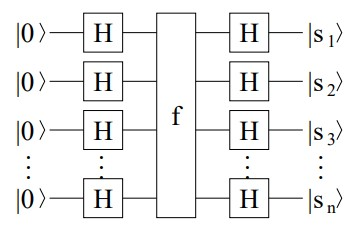

In [8]:
img = Image.open(r'C:\Users\54299\Desktop\Facultad\Trabajos\QuantumQuipu\Educacion y divulgacion\QComplexity\Bernstein-Vazarani.jpg')
display(img)

La aplicación de las primeras compuertas $H$ y de las consultas de fase con los qubits superpuestos (primeros dos pasos del algoritmo) es equivalente, matemáticamente, a $\frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n} (-1)^{s \cdot x}|x\rangle$. La consulta de fase nos permite generar un $\textbf{traslado de fase}$. Es decir, que cuando $s_i \cdot x_i = 1 $ para algun $0\leq i \geq n$, la fase de la cadena $i$ cambiara, lo que matematicamente se expresa 

## Referencias

mecanica cuantica definicion: https://es.wikipedia.org/wiki/Mec%C3%A1nica_cu%C3%A1ntica

normaL1L2: https://platzi.com/clases/1725-algebra-lineal/23886-tipos-de-normas-norma-0-norma-1-norma-2-norma-infi/#:~:text=La%20norma%20L1%3A%20devuelve%20la,del%20vector%20desde%20su%20origen.

integral de caminos: https://culturacientifica.com/2023/04/04/integral-de-caminos/#:~:text=La%20estrategia%20de%20Feynman%2C%20en,una%20part%C3%ADcula%20recorra%20ese%20camino.
https://es.wikipedia.org/wiki/Integral_de_caminos_(mec%C3%A1nica_cu%C3%A1ntica)

incomputabilidad: https://www.youtube.com/watch?v=otBmgwa_YPE

query model: https://www.cs.cmu.edu/~odonnell/quantum15/lecture05.pdf